In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc

In [2]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

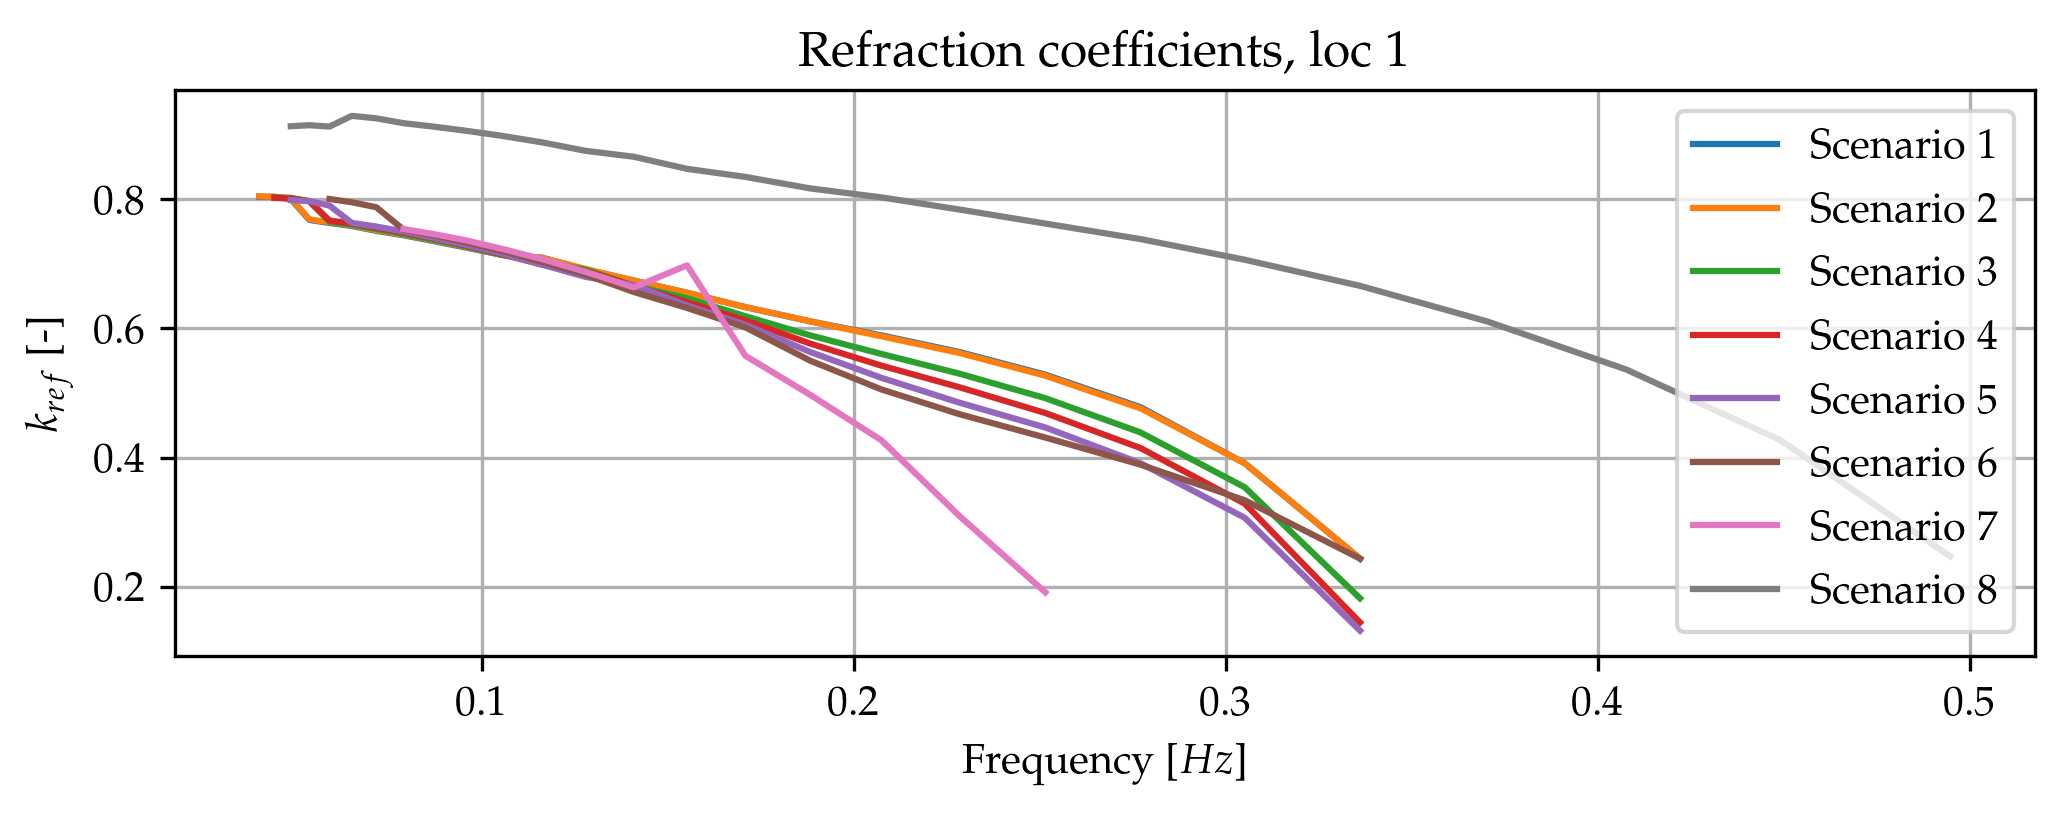

In [13]:
legend = '$\infty$', '500', '10','1','1/10','1/500','0','Easterly storm'
loc = 1
dirs = 135, 120, 153

plt.figure(figsize=[8,2.5])
plt.xlabel('Frequency [$Hz$]')
plt.ylabel('$k_{ref}$ [-]')
plt.title('Refraction coefficients, loc '+str(loc))
# plt.title('SWASH boundary wave spectrum, loc '+str(loc))
# plt.xlabel('Frequency [$Hz$]')
# plt.ylabel('Variance density $m^2/Hz$')
# plt.xlim(0.04,0.3)
plt.grid()
for scenario in range(1,9):
    work_dir = r'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Schenarios/Scenario_'+str(scenario)+'/SWASH/Input/'
    if (scenario==8):
        work_dir = r'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Schenarios/Scenario_'+str(scenario)+'_alt/SWASH/Input/'
    file_name = '1D_spec_'+str(loc)+'.bnd'
    file = open(work_dir+file_name, "r")
    list_of_lines = file.readlines()
    
    f = np.array(pd.read_csv(work_dir+file_name,skiprows=8,header=None,engine = "python").loc[0:,0][:32],float)
    var = pd.read_csv(work_dir+file_name, delimiter=r"\s+",skiprows=52,header=None,engine = "python").loc[0:,0]
    mdir = pd.read_csv(work_dir+file_name, delimiter=r"\s+",skiprows=52,header=None,engine = "python").loc[0:,1]
    f[var == -99] = np.nan
    mdir[var == -99] = np.nan
    var[var == -99] = np.nan
    
    k_ref = (np.cos((mdir - dirs[loc-1])*np.pi/180))**.5
    k_ref[k_ref<0] = 0
    
    ######         Writing new 1D spec file
    part = np.cos((mdir - dirs[loc-1])*np.pi/180)
    part[part<0] = 0

    var_n = var*part
    var_n_rnd = np.array(['{:g}'.format(float('{:.4g}'.format(i))) for i in var_n],float)
#     plt.plot(f,var_n_rnd,label='Scenario '+str(scenario))
    var_n_rnd[np.isnan(var_n_rnd)] = -99
    for i in range(52,84):
        start_line = list_of_lines[i][:1]
        end_line = list_of_lines[i][12:]
        new_line = start_line+str(var_n_rnd[i-52])+end_line
        list_of_lines[i] = new_line

#     new_file = open(work_dir+'1D_spec_ref_'+str(loc)+'.bnd', "w")
#     new_file.writelines(list_of_lines)
#     new_file.close()
    ######
    plt.plot(f,k_ref,label = 'Scenario '+str(scenario))

plt.legend()

In [4]:
work_dir = r'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Schenarios/Scenario_'+str(1)+'/SWASH/Input/'
file_name = '1D_spec_'+str(1)+'.bnd'
file = open(work_dir+file_name, "r")
list_of_lines = file.readlines()

f = np.array(pd.read_csv(work_dir+file_name,skiprows=8,header=None,engine = "python").loc[0:,0][:32],float)
var = pd.read_csv(work_dir+file_name, delimiter=r"\s+",skiprows=52,header=None,engine = "python").loc[0:,0]
mdir = pd.read_csv(work_dir+file_name, delimiter=r"\s+",skiprows=52,header=None,engine = "python").loc[0:,1]
f[var == -99] = np.nan
mdir[var == -99] = np.nan
var[var == -99] = np.nan

k_ref = (np.cos((mdir - dirs[loc-1])*np.pi/180))**.5
k_ref[k_ref<0] = 0
part = np.cos((mdir - dirs[loc-1])*np.pi/180)
part[part<0] = 0
######         Writing new 1D spec file
var_n = var*part
var_n_rnd = np.array(['{:g}'.format(float('{:.4g}'.format(i))) for i in var_n],float)

var_n_rnd[np.isnan(var_n_rnd)] = -99
for i in range(52,84):
    start_line = list_of_lines[i][:1]
    end_line = list_of_lines[i][12:]
    new_line = start_line+str(var_n_rnd[i-52])+end_line
    list_of_lines[i] = new_line
list_of_lines

    # new_file = open(work_dir+'1D_spec_ref_'+str(loc)+'.bnd', "w")
# new_file.writelines(list_of_lines)
# new_file.close()

['SWAN   1                                Swan standard spectral file, version\n',
 '$   Data produced by SWAN version 41.31A              \n',
 '$   Project: Eastbourne      ;  run number: sc1 \n',
 'LONLAT                                  locations in spherical coordinates\n',
 '     1                                  number of locations\n',
 '    0.317594   50.759209\n',
 'AFREQ                                   absolute frequencies in Hz\n',
 '    32                                  number of frequencies\n',
 '    0.0300\n',
 '    0.0330\n',
 '    0.0364\n',
 '    0.0401\n',
 '    0.0442\n',
 '    0.0486\n',
 '    0.0536\n',
 '    0.0590\n',
 '    0.0650\n',
 '    0.0716\n',
 '    0.0789\n',
 '    0.0869\n',
 '    0.0957\n',
 '    0.1054\n',
 '    0.1161\n',
 '    0.1278\n',
 '    0.1408\n',
 '    0.1551\n',
 '    0.1708\n',
 '    0.1882\n',
 '    0.2073\n',
 '    0.2283\n',
 '    0.2514\n',
 '    0.2770\n',
 '    0.3050\n',
 '    0.3360\n',
 '    0.3701\n',
 '    0.4076\n',
 '    

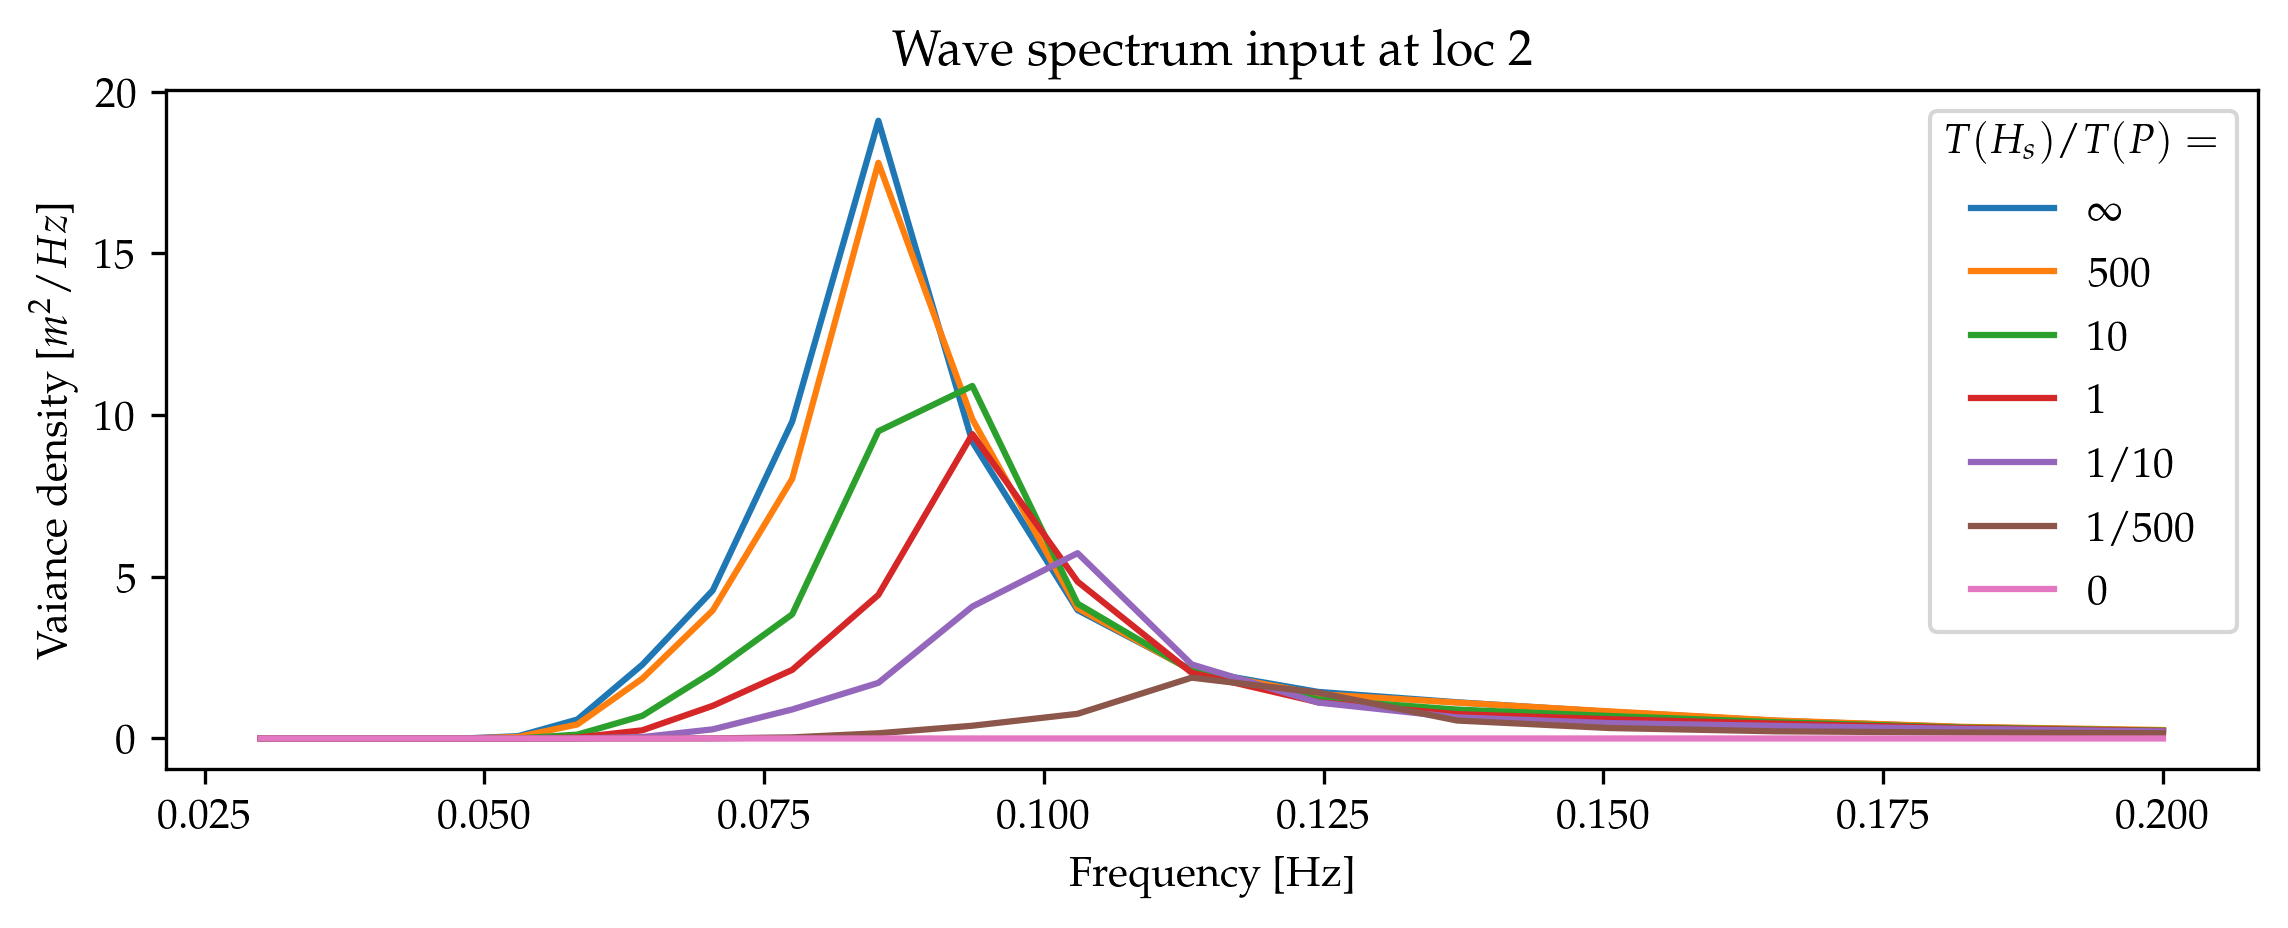

In [62]:
plt.figure(figsize=[9,3])
for i in range(7):
    rowi = pd.read_csv('Wave spectrum loc2.csv',delimiter = ',',header=None).iloc[:,order[i]+1]
    plt.plot(row1,rowi,label=legend[i])
plt.title("Wave spectrum input at loc 2")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Vaiance density [$m^2/Hz$]')
plt.legend(title="$T(H_s)/T(P)=$")

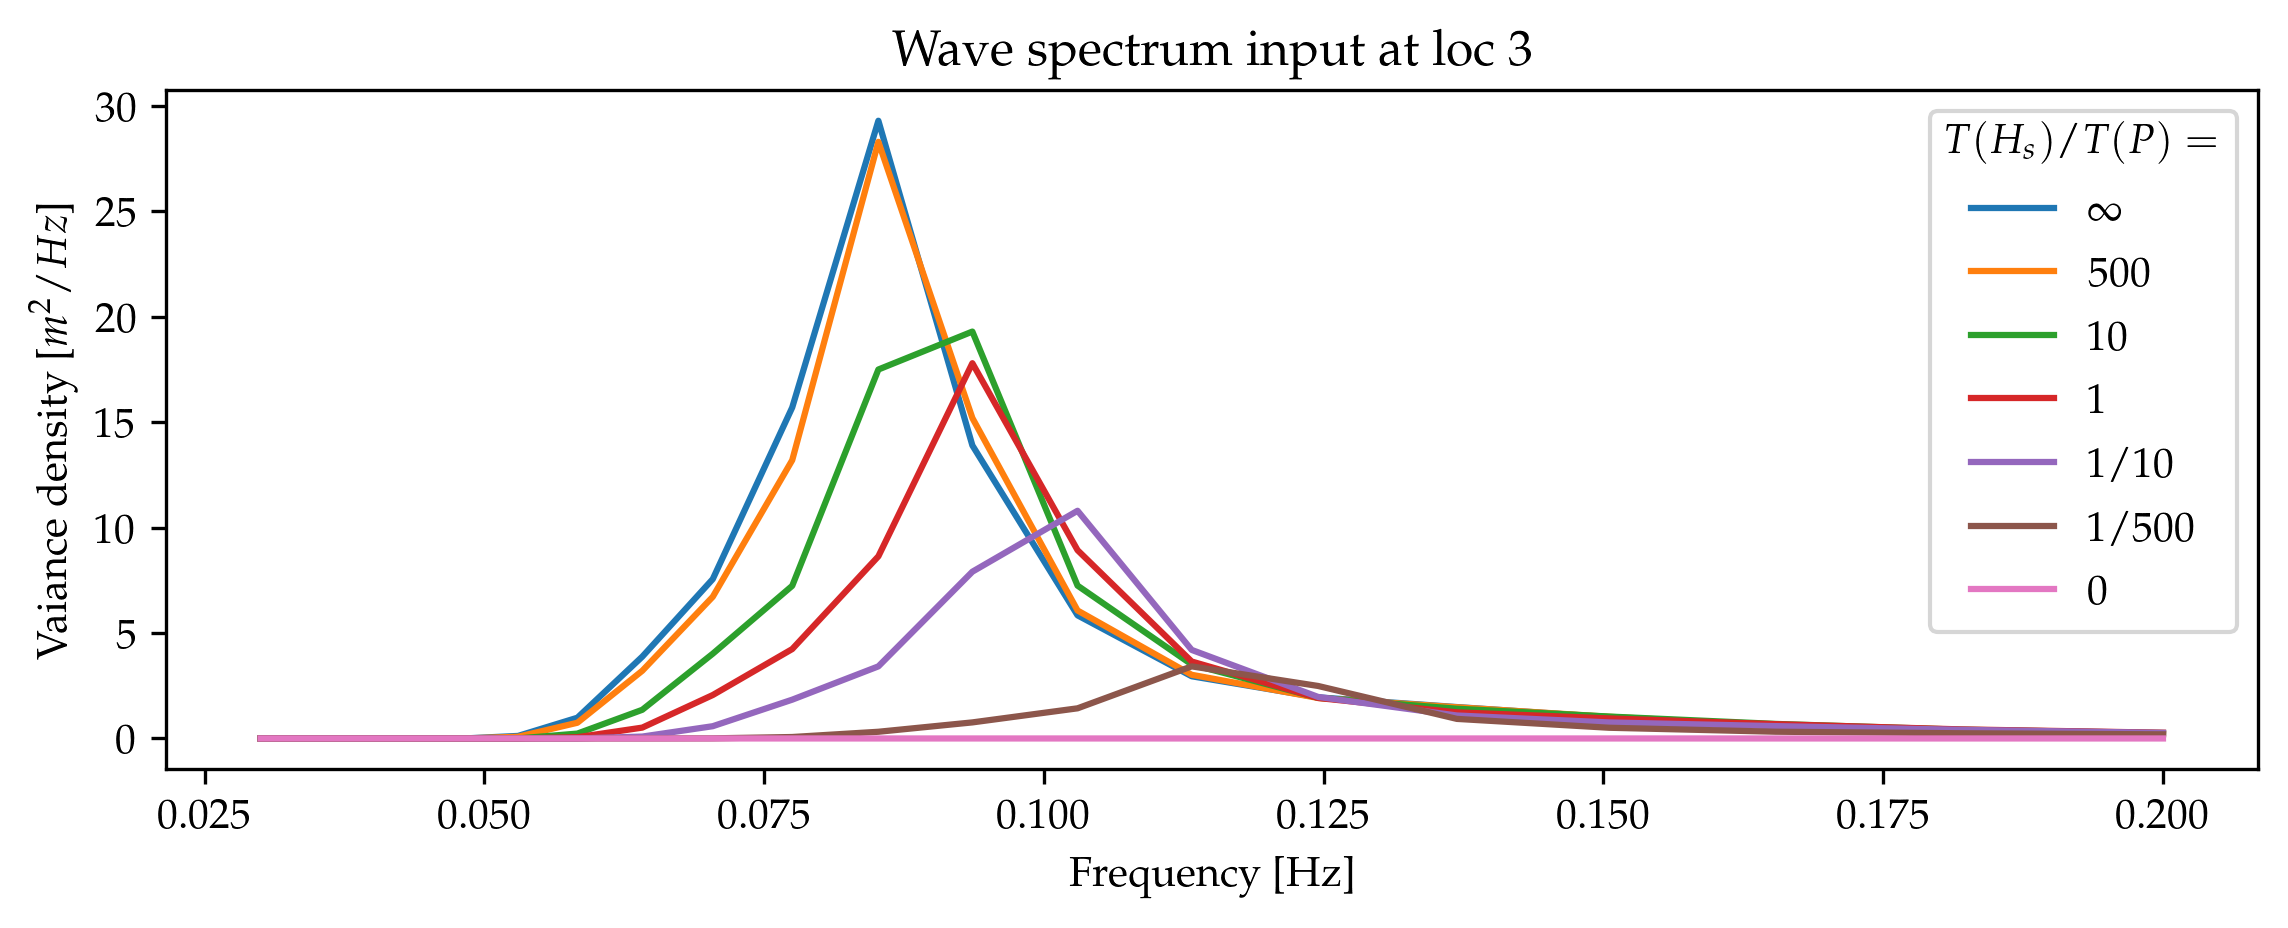

In [63]:
row1 = pd.read_csv('Wave spectrum loc3.csv',delimiter = ',',header=None).iloc[:,0]
legend = '$\infty$', '500', '10','1','1/10','1/500','0'
order = 0, 2, 4, 6, 5, 3, 1

plt.figure(figsize=[9,3])
for i in range(7):
    rowi = pd.read_csv('Wave spectrum loc3.csv',delimiter = ',',header=None).iloc[:,order[i]+1]
    plt.plot(row1,rowi,label=legend[i])
plt.title("Wave spectrum input at loc 3")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Vaiance density [$m^2/Hz$]')
plt.legend(title="$T(H_s)/T(P)=$")